# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [1]:
import cv2
import time
import numpy as np
import IPython.display as display
from PIL import Image
from io import BytesIO

img_path = 'images/lena.png'
img = cv2.imread(img_path)

In [2]:
def imshow(a, fmt='png'):
    if len(a.shape) == 3:
        a = a[:, :, ::-1]
    a = np.uint8(np.clip(a, 0, 255))
    c = BytesIO()
    Image.fromarray(a).save(c, fmt)
    display.display(display.Image(data=c.getvalue()))

## 上下左右翻轉圖片

flip image


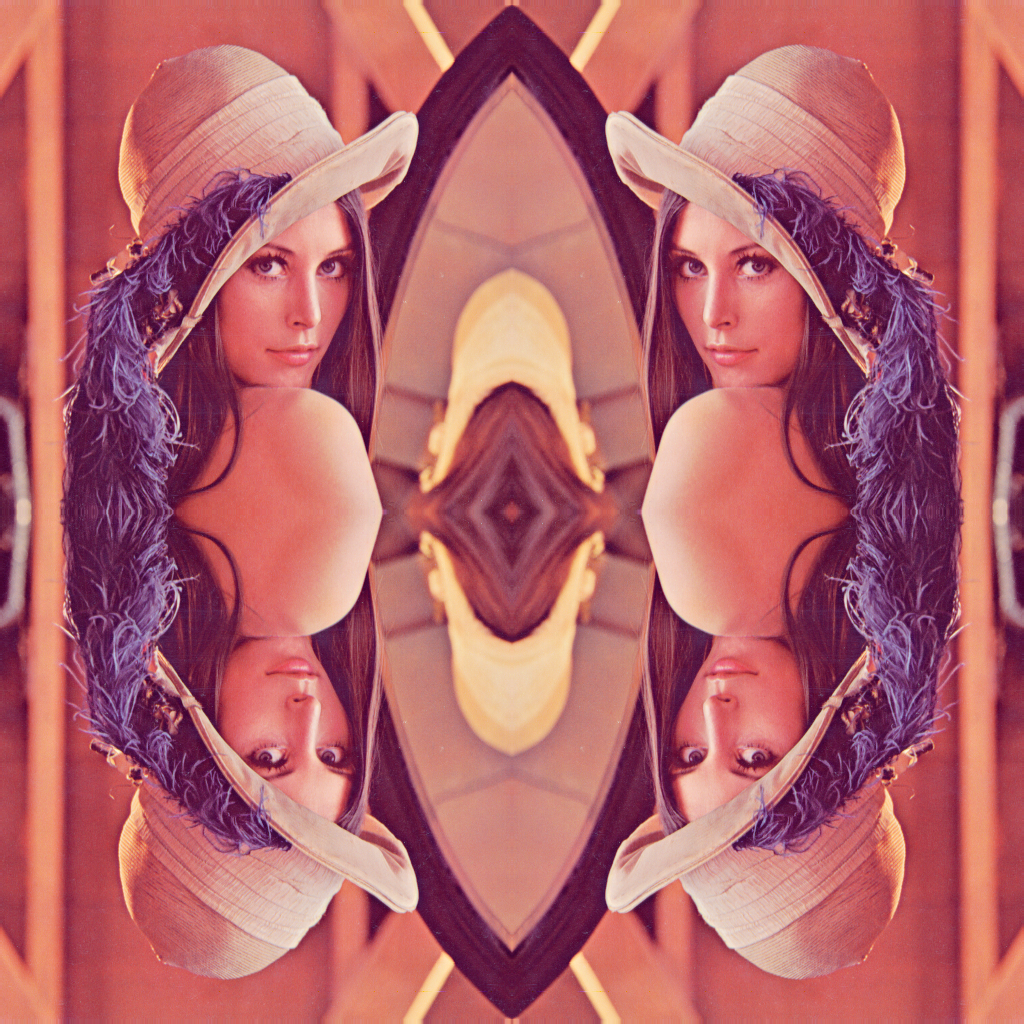

In [3]:
# 水平翻轉 (horizontal)
img_hflip = img[:, ::-1, :]

# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]

# 水平 + 垂直翻轉
img_hvflip = img[::-1, ::-1, :]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))

print('flip image')
imshow(img_flip)

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.03988480567932129
INTER_CUBIC zoom cost 0.15047240257263184
zoom image


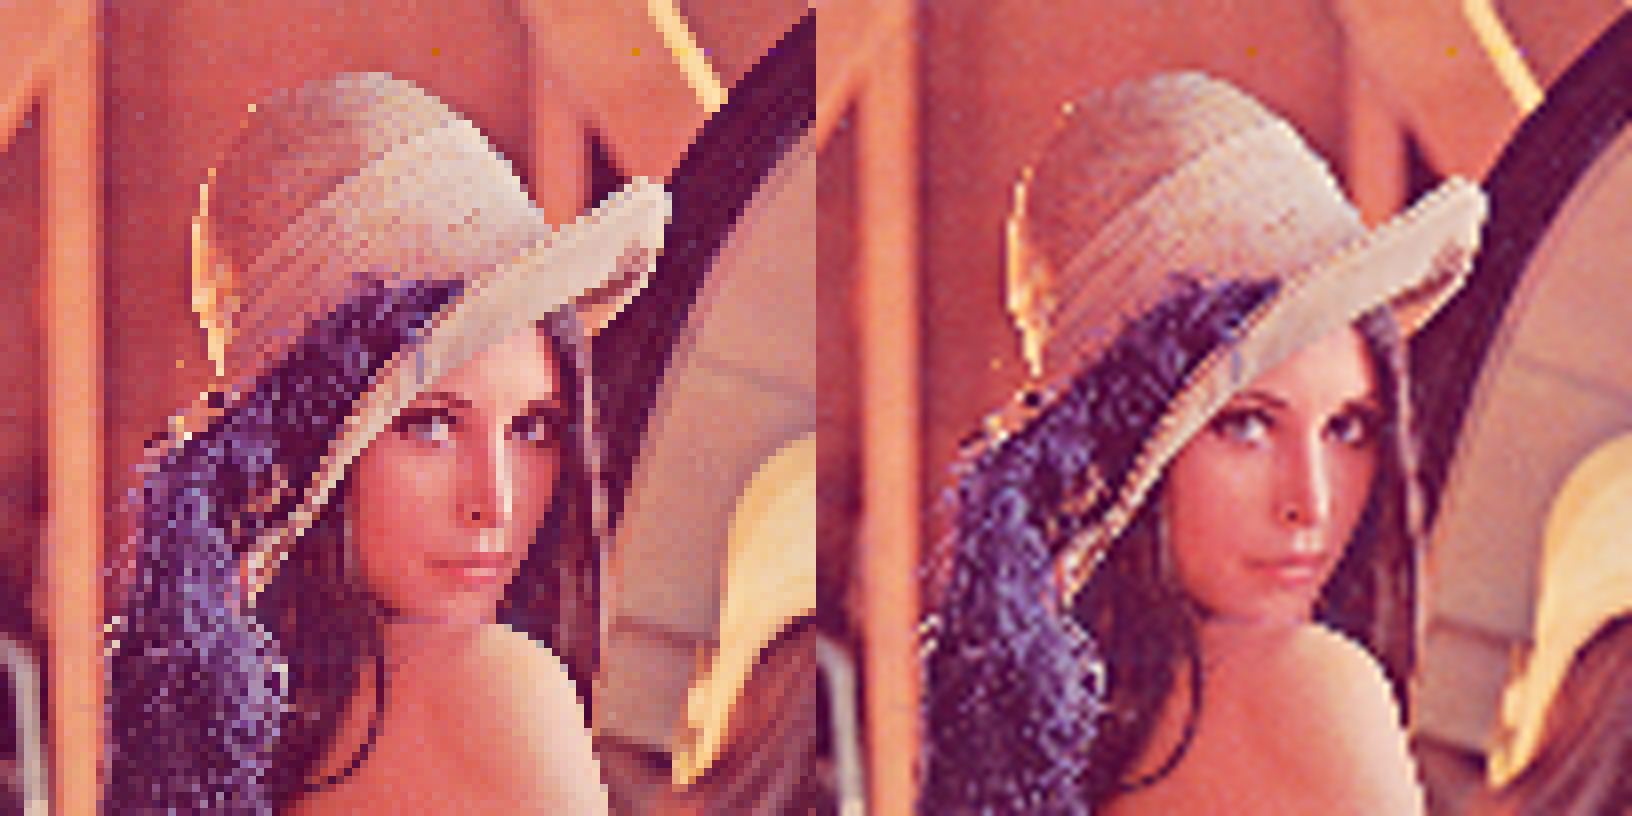

In [4]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# cv2.imwrite("cubic.png", img_cubic_scale)
# cv2.imwrite("near.png", img_area_scale)
# 組合 + 顯示圖片
img_zoom = np.hstack((img_area_scale, img_cubic_scale))
print('zoom image')
imshow(img_zoom)

## 平移幾何轉換

shift image


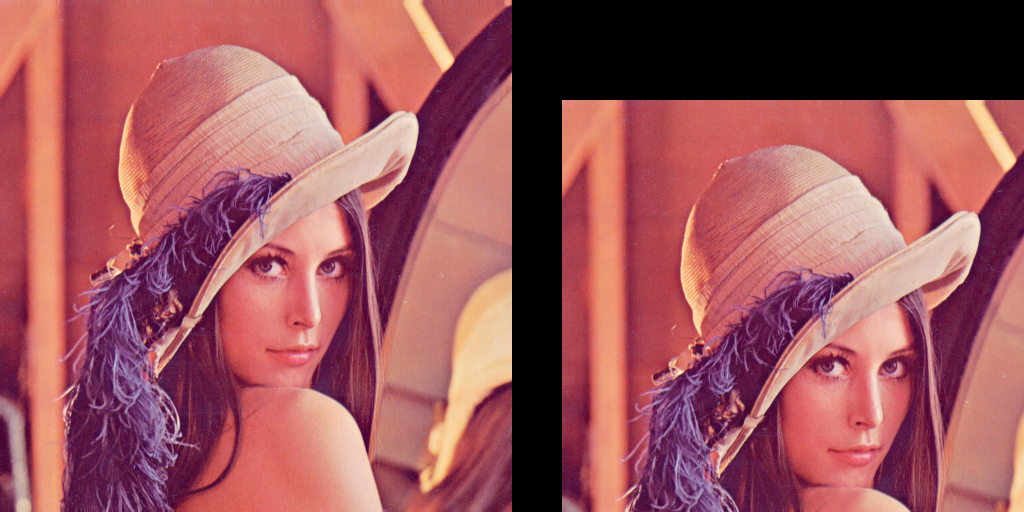

In [5]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 50], [0, 1, 100]], dtype=np.float64)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))
print('shift image')
imshow(img_shift)